# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()  # need help !

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_url = btc_url + "/1?json"
btc_response_data = requests.get(btc_url).json()
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
my_btc_value = btc_price * my_btc

# Fetch current ETH price
eth_url = eth_url + '/1027?json'
eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']
my_eth_value = eth_price * my_eth

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The current value of your 1.2 BTC is $35,446.80
The current value of your 5.3 ETH is $9,816.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 110

In [7]:
# Set Alpaca API key and secret
# alpaca_api_key = os.getenv("ALPACA_API_KEY")    
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_api_key = "PK84JC6MTKQLA1V8HZ19"                          # cannot get .env to work
alpaca_secret_key = "WEqRj6rGf2ZxWcz586LbjST1es3vCKozE6VaD5vZ"   # I will get new keys

# Create the Alpaca API object
alpaca = tradeapi.REST(    
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

type(alpaca)


alpaca_trade_api.rest.REST

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-08-08", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
prices_df = alpaca.get_bars(  
    tickers,
    timeframe,
    start = today,
    end = today
).df
prices_df

# Reorganize the DataFrame
# Separate ticker data
agg_df = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1) 
spy_df = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1) 

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([agg_df, spy_df],axis=1, keys=['AGG','SPY'])
portfolio_df.index = portfolio_df.index.date  

# Preview DataFrame
portfolio_df

AGG                                                          \
             open     high     low  close   volume trade_count       vwap   
2023-08-08  96.94  97.1092  96.835  96.93  6867329       28544  96.937785   

               SPY                                                    \
              open      high       low   close    volume trade_count   
2023-08-08  448.08  450.6952  445.2705  448.75  71361323      527037   

                        
                  vwap  
2023-08-08  447.537525

In [9]:
# Pick AGG and SPY close prices
agg_close_price = portfolio_df['AGG']['close'][0]
spy_close_price = portfolio_df['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.93
Current SPY closing price: $448.75


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 110 SPY shares is $49,362.50
The current value of your 200 AGG shares is $19,386.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12_000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_spy_value + my_agg_value
total_savings = crypto_value + shares_value

# Create savings DataFrame
df_savings = pd.DataFrame()
df_savings['assets'] = ['crypto', 'shares']
df_savings['amount'] = [crypto_value, shares_value]
df_savings.index = df_savings['assets']
df_savings

# Display savings DataFrame
display(df_savings)


,assets,amount
assets,,
crypto,crypto,45263.672
shares,shares,68748.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

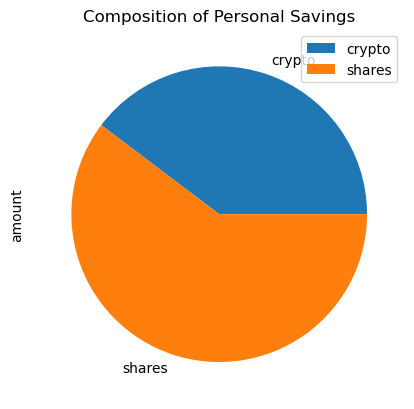

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='amount',x='assets', title='Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# 'total_savings calculated above'

# Validate saving health
if total_savings >= emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
else:
    print('It is recommended that an emergency fund should cover at least 3 months of earnings')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-08-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-08-08', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_bars(  
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
AGG_df = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1) 
SPY_df = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1) 

# Concatenate the ticker DataFrames
portfolio_df = pd.concat([AGG_df, SPY_df],axis=1, keys=['AGG','SPY'])
portfolio_df.index = portfolio_df.index.date  

# Display sample data
portfolio_df.head()


AGG                                                  \
              open      high      low   close   volume trade_count   
2018-08-01  105.55  105.7600  105.512  105.70  4534062       18024   
2018-08-02  105.76  105.7600  105.650  105.74  3671901       13787   
2018-08-03  105.81  105.9799  105.810  105.97  2542872       11998   
2018-08-06  106.03  106.1100  106.000  106.04  4120716       13656   
2018-08-07  105.97  105.9700  105.825  105.85  2532774        9522   

                           SPY                                        \
                  vwap    open      high       low   close    volume   
2018-08-01  105.682721  281.56  282.1300  280.1315  280.89  55015826   
2018-08-02  105.721750  279.39  282.5800  279.1600  282.36  63766084   
2018-08-03  105.924304  282.53  283.6577  282.3300  283.62  53965986   
2018-08-06  106.067586  283.64  284.9900  283.2015  284.66  39450487   
2018-08-07  105.876672  285.39  286.0100  285.2400  285.58  43427090   

                                    
           trade_count        vwap  
2018-08-01      244835  281.076175  
2018-08-02      247750  281.496534  
2018-08-03      201724  283.200895  
2018-08-06      159467  284.366423  
2018-08-07      181015  285.635439

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)
# type(MC_thirtyyear)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                                  \
              open      high      low   close   volume trade_count   
2018-08-01  105.55  105.7600  105.512  105.70  4534062       18024   
2018-08-02  105.76  105.7600  105.650  105.74  3671901       13787   
2018-08-03  105.81  105.9799  105.810  105.97  2542872       11998   
2018-08-06  106.03  106.1100  106.000  106.04  4120716       13656   
2018-08-07  105.97  105.9700  105.825  105.85  2532774        9522   

                                        SPY                              \
                  vwap daily_return    open      high       low   close   
2018-08-01  105.682721          NaN  281.56  282.1300  280.1315  280.89   
2018-08-02  105.721750     0.000378  279.39  282.5800  279.1600  282.36   
2018-08-03  105.924304     0.002175  282.53  283.6577  282.3300  283.62   
2018-08-06  106.067586     0.000661  283.64  284.9900  283.2015  284.66   
2018-08-07  105.876672    -0.001792  285.39  286.0100  285.2400  285.58   

                                                           
              volume trade_count        vwap daily_return  
2018-08-01  55015826      244835  281.076175          NaN  
2018-08-02  63766084      247750  281.496534     0.005233  
2018-08-03  53965986      201724  283.200895     0.004462  
2018-08-06  39450487      159467  284.366423     0.003667  
2018-08-07  43427090      181015  285.635439     0.003232

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Nick Hugh\Repos\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003123,1.005209,1.001255,0.996176,1.003820,1.014334,0.999845,1.008738,0.993099,1.005910,...,1.001940,0.992233,1.000184,0.988844,1.004699,0.996536,1.005076,0.996165,0.982575,0.990388
2,1.006771,1.013926,0.994218,0.980833,0.994533,1.022007,0.983028,1.010707,0.984931,1.005672,...,1.006627,0.978563,1.008070,0.997992,1.009288,0.993916,1.008711,0.993516,0.984278,1.004938
3,1.018784,1.019968,0.992473,0.978085,1.000281,1.007611,0.998712,1.005229,0.967499,0.994753,...,1.015180,0.977085,1.020993,1.001017,1.022968,0.994679,1.015432,0.984391,0.988747,1.007843
4,1.025855,1.027661,0.983939,0.974796,0.987413,1.008801,1.008372,0.992923,0.963450,1.006096,...,1.017727,0.972866,1.024343,0.991665,1.012101,0.986983,1.021275,0.978552,0.999223,1.019136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.060646,9.147770,2.400961,12.852096,9.762679,1.405737,2.556036,3.937132,2.288028,9.469273,...,10.624251,13.475716,7.295907,10.939594,4.157014,5.923156,2.849621,7.954151,5.261380,9.448742
7557,3.076981,9.263868,2.383415,12.659653,9.649444,1.389727,2.534344,3.971951,2.296991,9.387404,...,10.717325,13.308909,7.398557,10.874385,4.220963,5.897365,2.846253,7.865421,5.232433,9.436246
7558,3.071761,9.342648,2.391498,12.738050,9.594803,1.384787,2.539294,3.943739,2.296096,9.295048,...,10.668086,13.308036,7.404864,10.728174,4.233104,5.817187,2.863367,7.835457,5.265431,9.467849
7559,3.086775,9.449293,2.405665,12.593018,9.546712,1.375870,2.530529,3.898755,2.293742,9.231642,...,10.663608,13.107343,7.390858,10.793280,4.211648,5.838614,2.896559,7.873570,5.256257,9.471937


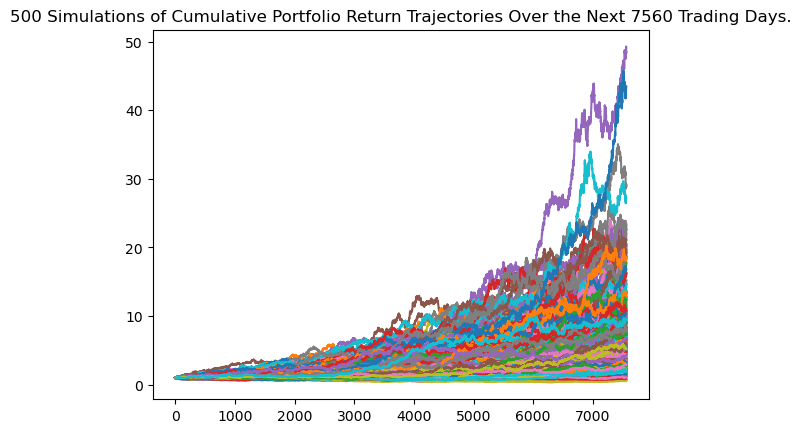

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# # Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

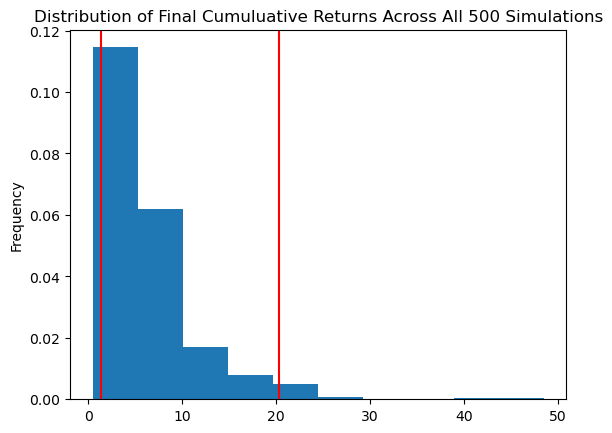

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
Simulation_summary = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(Simulation_summary)


count           500.000000
mean              6.404262
std               5.356522
min               0.502250
25%               3.061502
50%               4.815129
75%               7.803165
max              48.519197
95% CI Lower      1.355354
95% CI Upper     20.360153
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_thirty = round(Simulation_summary[8]*initial_investment,2)
ci_upper_thirty = round(Simulation_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $27107.09 and $407203.07


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_thirty = round(Simulation_summary[8]*initial_investment,2)
ci_upper_thirty = round(Simulation_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty} and ${ci_upper_thirty}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $40660.63 and $610804.6


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
# type(MC_five_year)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Nick Hugh\Repos\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988168,0.985980,0.998811,1.009734,0.991871,0.981454,0.995302,0.995424,1.000587,1.006049,...,0.997483,0.978602,0.995290,1.010555,0.981314,1.007926,0.999892,1.006735,0.994687,0.998191
2,0.980803,0.980038,0.994553,1.018070,0.995443,0.987356,0.998683,0.985319,0.997904,1.003370,...,1.004233,0.983952,1.000855,1.004604,0.983544,1.011890,0.997677,1.010915,0.991038,0.988929
3,0.978621,0.986991,1.001767,1.023710,0.986665,0.996884,0.994899,0.995033,0.999221,1.012789,...,1.005115,0.984709,1.005155,1.003380,0.988101,1.017402,1.004616,1.018947,0.988713,0.990420
4,0.969013,0.984067,1.011772,1.025475,1.002057,0.994673,0.985817,0.987308,1.002802,1.015412,...,0.992605,0.985823,1.014990,1.010310,1.007122,1.010345,0.996461,1.011445,0.988147,1.001509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.247366,1.188530,1.812321,1.335357,1.149617,1.252021,1.534585,1.040428,2.111708,1.336554,...,0.799184,1.313781,0.981125,2.975916,1.254180,1.664641,1.018302,1.027128,1.985878,1.028099
1257,1.230570,1.175006,1.784677,1.341809,1.155309,1.259530,1.548335,1.035844,2.120567,1.329552,...,0.792204,1.308057,0.984385,2.959535,1.240539,1.659987,1.014483,1.031398,1.986546,1.034869
1258,1.224191,1.168879,1.801686,1.320251,1.153564,1.268821,1.568883,1.044241,2.129559,1.358165,...,0.791086,1.310434,0.983980,2.979351,1.249447,1.674743,1.011244,1.029295,1.996912,1.034392
1259,1.232885,1.166437,1.797146,1.322693,1.160144,1.256451,1.562707,1.050479,2.129969,1.371589,...,0.784462,1.327958,0.991318,2.993569,1.248828,1.692405,1.000092,1.028536,1.985474,1.040380


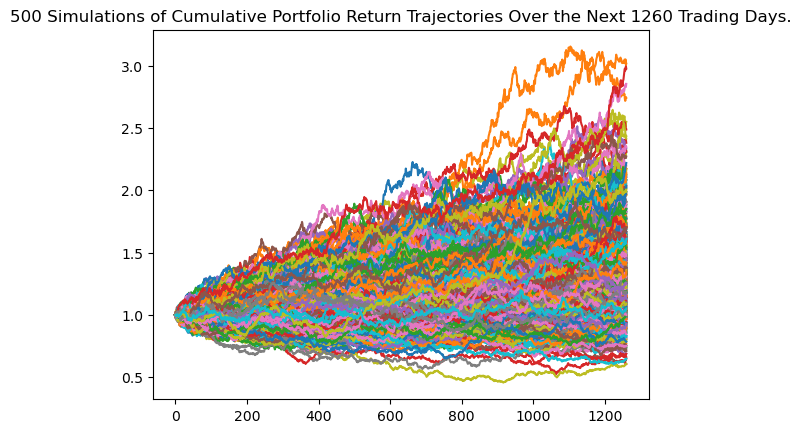

In [26]:
# Plot simulation outcomes
line_plot_5 = MC_five_year.plot_simulation()

# # Save the plot for future usage
line_plot_5.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

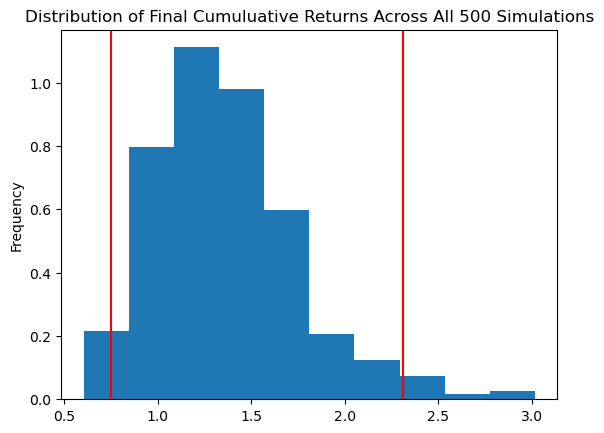

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
Simulation_summary_5 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(Simulation_summary_5)

count           500.000000
mean              1.364755
std               0.382173
min               0.605321
25%               1.091751
50%               1.320819
75%               1.576842
max               3.015840
95% CI Lower      0.750173
95% CI Upper      2.308550
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(Simulation_summary_5[8]*initial_investment,2)
ci_upper_5 = round(Simulation_summary_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $45010.4 and $138513.0


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = portfolio_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Nick Hugh\Repos\Module 5 Challenge\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000481,0.994900,1.000058,1.001660,1.001933,0.998797,0.997485,1.010987,0.996330,1.019067,...,0.996854,0.994538,1.013415,0.992948,1.002234,1.001971,1.001222,1.002616,0.990399,0.993422
2,1.010911,1.005592,1.002274,1.011227,1.015847,1.005183,0.993629,1.003642,1.001347,1.017057,...,0.989528,0.987650,1.005023,0.994803,1.006828,0.983856,0.995223,1.001317,0.993709,1.001327
3,1.013838,0.992200,0.986029,1.018216,0.997035,1.005268,0.992417,1.009973,1.004754,1.009614,...,0.986413,0.990532,1.012156,0.993064,0.991255,0.984647,1.001750,0.999199,0.976758,0.983195
4,1.023313,0.988290,0.980064,1.015752,0.979238,0.993848,0.993601,1.014611,1.011980,1.009933,...,0.993240,0.989750,1.014808,1.004910,0.996654,0.982273,1.010730,0.990292,0.975428,0.991206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.188804,0.888995,2.012286,1.647791,1.946594,2.437371,3.049279,1.642413,3.129777,2.109667,...,2.150245,0.781534,2.399851,2.199291,1.039880,0.978885,1.636118,1.274473,2.063887,1.424672
2517,2.189452,0.889535,2.016398,1.641048,1.937229,2.431202,3.023692,1.643604,3.145355,2.094287,...,2.118909,0.795016,2.431216,2.188194,1.036604,0.990213,1.653490,1.277908,2.064903,1.424948
2518,2.216601,0.904069,2.004313,1.614255,1.929143,2.447527,3.066104,1.656363,3.139805,2.094518,...,2.093636,0.800318,2.412787,2.153615,1.034204,0.991510,1.664743,1.276298,2.038007,1.431124
2519,2.209240,0.906376,2.022989,1.601953,1.942805,2.463547,3.049786,1.634323,3.149845,2.085629,...,2.081803,0.805336,2.429000,2.125169,1.029255,0.988133,1.678849,1.279473,2.040479,1.444352


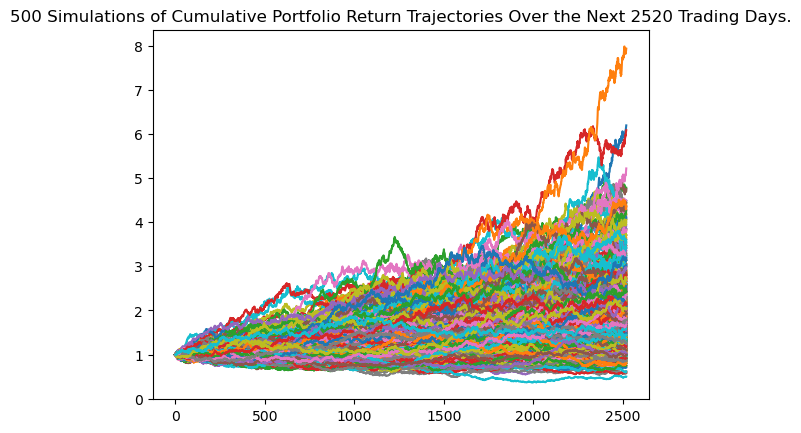

In [32]:
# Plot simulation outcomes
line_plot_10 = MC_ten_year.plot_simulation()

# # Save the plot for future usage
line_plot_10.get_figure().savefig("MC_10_year_sim_plot.png", bbox_inches="tight")

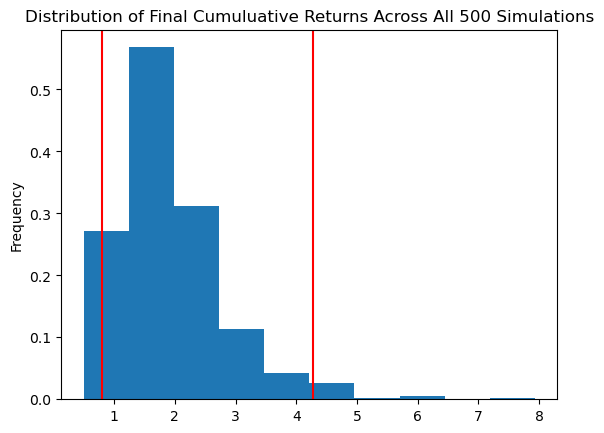

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
Simulation_summary_10 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(Simulation_summary_10)


count           500.000000
mean              1.364755
std               0.382173
min               0.605321
25%               1.091751
50%               1.320819
75%               1.576842
max               3.015840
95% CI Lower      0.750173
95% CI Upper      2.308550
Name: 1260, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(Simulation_summary_10[8]*initial_investment,2)
ci_upper_10 = round(Simulation_summary_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $45010.4 and $138513.0
